<img src = "https://drive.google.com/uc?export=view&id=1HYrQHu1AE2cEid3BpNxo5KK3tuZF1TCo" alt = "Encabezado MLDS" width = "100%">  </img>

#**Tarea 5 : Visualización de mapas coropléticos con *GeoPandas***
---

Este es una tarea para practicar las habilidades adquiridas usando *GeoPandas*  para manipular datos geoespaciales y construir visualizaciones de datos. En esta actividad usted deberá recrear una visualización de datos de los paises de America latina.


> **Nota:** Esta tarea va a ser calificada estableciendo una conexión con **[UNCode](https://juezun.github.io/)**. La conexión se realizará al ejecutar la celda indicada e ingresando los datos de usuariio.En cada ejercicio se indicará si es calificable o no, también los lugares donde debe escribir su código sin modificar lo demás con un aproximado de cantidad de líneas a escribir. No se preocupe si su código toma más líneas, esto es simplemente un aproximado destinado a que pueda replantear su estrategia si el código está tomando más de las esperadas. No es un requisito estricto y soluciones más largas también son válidas.

>**La tarea es incremental, es recomendable resolver los puntos en orden.**

>En caso de tener dudas de cómo solucionar este tipo de ejercicios, por favor consultar el demo en la unidad 0

Ejecute la siguiente celda para importar las librerías.

In [1]:
#TEST_CELL
# Instalamos GeoPandas.
!pip install -q geopandas

In [2]:
# Importar librerías.
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
#TEST_CELL
!python --version
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('GeoPandas', gpd.__version__)

Python 3.12.12
Pandas 2.2.2
Matplotlib 3.10.0
GeoPandas 1.1.2


## **Conexión UNCode**

In [4]:
%%capture
!pip install rlxcrypt
!wget --no-cache -O session.pye -q https://raw.githubusercontent.com/JuezUN/INGInious/master/external%20libs/session.pye

In [5]:
import rlxcrypt
import session

grader = session.LoginSequence("AYVDD-GroupMLDS-1-2026-1@129c7d2b-cf83-4c9a-a0cb-cdc6ad11c37e")

> Al finalizar, podrás revisar en UNCode tus submissions en la [página de la tarea.](https://uncode.unal.edu.co/course/AYVDD-GroupMLDS-1-2026-1/129c7d2b-cf83-4c9a-a0cb-cdc6ad11c37e)

Este material fue realizado con las siguientes versiones:

- Python 3.11.12
- Pandas 2.2.2
- Matplotlib 3.10.0
- GeoPandas 1.0.1


## **0.  Leer el archivo de datos**
---
> **IMPORTANTE:** Cargue los datos mediante el siguiente enlace o ejecute el siguiente código

  1. Por favor descargue el archivo con el conjunto de datos desde el siguiente enlace: **[south-america.json](https://raw.githubusercontent.com/codeforgermany/click_that_hood/refs/heads/main/public/data/south-america.geojson)**.
  
  2. En el enlace, haga clic derecho y seleccione la opción **"Guardar como..."**.

  3. Cargue este archivo en su sistema de archivos de **Google Colaboratory**. Para hacer esto:
    
* Haga clic donde aparece el icono del directorio en la parte izquierda de la ventana en *Google Colaboratory* (resaltado en azul en la siguiente imagen con el número 1).
* Después, haga clic en el icono **"Subir"** (resaltado en azul en la siguiente imagen con el número 2).
* Seleccione el archivo **`south-america.json`** que previamente descargó y haga clic en **"Aceptar"**.

<img src = "https://drive.google.com/uc?export=view&id=13W59jfdOpAn_DYIjpXt4WPBZiU7BlRGY" alt = "Sistema archivos colab" width = "70%">  </img>

4. Ejecute la siguiente celda para cargar el conjunto de datos dentro del DataFrame de *pandas* llamado **`paises_gdf`**:

In [6]:
#TEST_CELL
#@markdown > **Nota**: De manera alternativa, ejecute esta celda para descargar el archivo directamente.

# Descargamos el archivo.
!wget -q https://raw.githubusercontent.com/mindlab-unal/mlds1-datasets/refs/heads/main/actividades/sur-america.geojson
!ls

sample_data  session.pye  sur-america.geojson


In [7]:
### EJECUTAR ESTA CELDA SIN MODIFICARLA. SI FALLA, DEBE SEGUIR EL PROCEDIMIENTO DESCRITO ANTES.
paises_gdf = gpd.read_file('sur-america.geojson')
paises_gdf.head()

,nombre,area,perimetro,pob_total,pob_capital,pob_resto,geometry
0,French Guiana (France),83534,1563,282731,282731,0,"POLYGON ((-52.28892 4.87612, -52.32461 4.7709,..."
1,Brazil,8515767,16145,217203394,11967825,205235569,"MULTIPOLYGON (((-48.48589 -27.76699, -48.55459..."
2,Chile,756102,7801,19629590,5740000,13889590,"MULTIPOLYGON (((-67.5752 -55.88965, -67.61143 ..."
3,Argentina,2780400,15000,46654581,3100000,43554581,"MULTIPOLYGON (((-64.54917 -54.71621, -64.43882..."
4,Bolivia,1098581,7777,12244159,816000,11428159,"POLYGON ((-58.15977 -20.16465, -58.13994 -19.9..."


Este conjunto de datos cuenta con los siguientes datos por cada uno de los departamentos del país:

- **`geometry`**: como todo _GeoDataFrame_, nuestro conjunto de datos cuenta con la geometría del perímetro de cada departamento.
- **`area`, `perimetro`**: además de la geometría, el conjuinto de datos cuenta con datos del área (en $km^2$) y el perimetro (en $km$) de cada departamento.



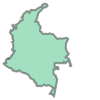

In [25]:
#TEST_CELL

# Pruebe cambiando el departamento por otro de los nombres válidos del conjunto.
# Recuerde  que el índice tiene que ser exacto o la ejecución fallara.

paises_gdf.loc[5, 'geometry']

- **`pob_total`, `pob_cabecera` y `pob_resto`**: este conjunto de datos viene con proyecciones oficiales de información poblacional de cada pais, con una variable para la población de la **capital** (**`pob_capital`**), del **resto de la region** (**`pob_resto`**) y la suma de ambos valores (**`pob_total`**).

> **Nota:** No se preocupe por el archivo del dataset en ***UNCode***, el ambiente de calificación ya cuenta con este archivo para calificar sus ejercicios.

## **1. Países por población**
---

En este primer ejercicio, deberás **replicar el mapa** de **países codificados por población**, donde el valor de la población se representa mediante una escala de color.

Para ello, utilizarás el método **`.plot()`** del objeto `GeoDataFrame`, cumpliendo con los siguientes requisitos:


### **Requisitos de la visualización**

- El mapa debe ser graficado sobre un objeto **`Axes`** de `Matplotlib` previamente definido. Para ello, utiliza el argumento **`ax`** dentro del método `.plot()`.
- La visualización debe incluir una **leyenda** que represente la escala de colores. Esta será una **barra de color autogenerada**.
- El objeto `Axes` debe tener el siguiente título exacto:

  ```python
  'Sur America'
  ```
- El color codificará la población (variable continua) de cada departamento, identificado por la variable **`pob_total`**.
- Utiliza el siguiente colormap de Matplotlib para codificar los valores:

  ```python
  cmap = 'gnuplot'
  ```

> **NOTA: Los comandos para graficar y modificar una figura deberían ir todos en la misma celda. Separarlos en celdas distintas puede causar que no se grafique nada.**

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>
<p>

* Ponga especial atención a los detalles. Elementos como los títulos de las gráficas no son generados por defecto y puede necesitar definirlos.
* El título de la gráfica deberá ser asignado directamente en el objeto **`Axes`** de _Matplotlib_.

    ```python
    ax.set_title('Título de la gráfica')
    ```
* El método **`.plot`** de los objetos **`GeoDataFrame`** recibe múltiples argumentos que le permiten definir detalles de la visualización.

  1. **`column`** - determina la variable respecto a la cual se codifica el color.
  2. **`cmap`** - determina el _colormap_ de _Matplotlib_ usado en la visualización.
  3. **`legend`** - recibe un _booleano_ que determina si se visualiza o no la leyenda. Por defecto **NO** se visualiza.

  
* Detalles como el **`dpi`** no son calificados, pero se recomienda no modificar para que la referencia de salida esperada corresponda y sea más fácil identificar las diferencias.

</p>

(np.float64(-113.1655641),
 np.float64(-31.074035900000002),
 np.float64(-59.3080027),
 np.float64(15.8506787))

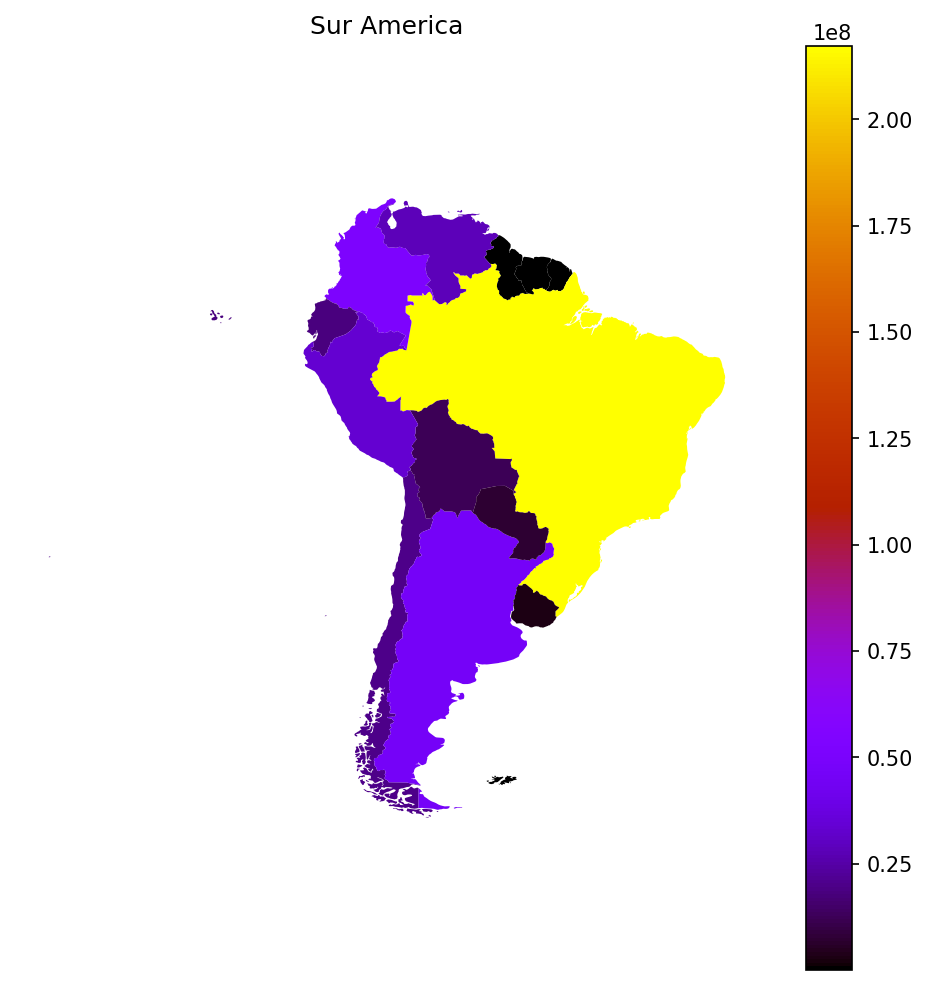

In [29]:
# VARIABLES CALIFICADAS: fig1, ax_pob
fig1, ax_pob = plt.subplots(1,                  # Solo un objeto Axes para la figura.
                               figsize=(8, 8), # Tamaño de la figura.
                               dpi=150,
                               )         # Puntos por pulgada de la imagen.
paises_gdf.plot(column='pob_total', cmap='gnuplot',legend= True, ax=ax_pob)
# Preparamos la gráfica eliminando los bordes numéricos innecesarios.
ax_pob.set_title('Sur America')
ax_pob.axis('off')
plt.axis('equal')

> **Salida esperada:**
***
<img src = "https://drive.google.com/uc?export=view&id=1VpVClB0YOSW0_VCWZCcUEZRuZtz9I_5B" alt = "Encabezado MLDS" width = "100%">  </img>

### **Evaluar código**

In [30]:
grader.run_test("Test 1_1", globals())

Test 1_1


In [31]:
grader.run_test("Test 1_2", globals())

Test 1_2


## **2. Mapa de Países**
---

En este segundo ejercicio, deberás **replicar el mapa** de los **países de Sur América**, donde cada país es coloreado según la **región a la que pertenece**.

Para ello, utilizarás el método **`.plot()`** del objeto `GeoDataFrame`, cumpliendo con los siguientes requisitos:


### **Requisitos de la visualización**

- El mapa debe ser graficado sobre un objeto **`Axes`** de `Matplotlib` previamente definido. Para esto, utiliza el argumento **`ax`** del método `.plot()`.
- La visualización debe incluir una **leyenda** que indique la codificación por región.
- El objeto `Axes` debe tener el siguiente título exacto:

  ```python
  'MAPA DE PAISES DE SUR AMERICA'
  ```
- El color codificará la región (variable discreta) de cada pais, identificado por la variable **`nombre`**. Además de esto, deberá utilizar el siguiente _colormap_ exacto de _Matplotlib_:

  ```python
  cmap = 'Pastel1'
  ```

- Para una fidelidad completa en la representación, el método **`.plot`** deberá recibir los siguientes argumentos que definen el grosor de los mapas:

  ```python
  .plot(...                                   
        edgecolor='black',
        linewidth=0.7)
  ```

> **NOTA: Los comandos para graficar y modificar una figura deberían ir todos en la misma celda. Separarlos en celdas distintas puede causar que no se grafique nada.**

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>
<p>

* Ponga especial atención a los detalles. Elementos como los títulos de las gráficas no son generados por defecto y puede necesitar definirlos.
* El título de la gráfica deberá ser asignado directamente en el objeto **`Axes`** de _Matplotlib_.

    ```python
    ax.set_title('Título de la gráfica')
    ```
* El método **`.plot`** de los objetos **`GeoDataFrame`** recibe múltiples argumentos que le permiten definir detalles de la visualización.

  1. **`column`** - determina la variable respecto a la cual se codifica el color.
  2. **`cmap`** - determina el _colormap_ de _Matplotlib_ usado en la visualización.
  3. **`legend`** - recibe un _booleano_ que determina si se visualiza o no la leyenda. Por defecto **NO** se visualiza.
  4. **`edgecolor`** - determina el color del borde de las figuras geoespaciales dibujadas.
  4. **`linewidth`** - determina el grosor del borde de las figuras geoespaciales dibujadas.


* Detalles como el **`dpi`** no son calificados, pero se recomienda no modificar para que la referencia de salida esperada corresponda y sea más fácil identificar las diferencias.

</p>

(np.float64(-113.1655641),
 np.float64(-31.074035900000002),
 np.float64(-59.3080027),
 np.float64(15.8506787))

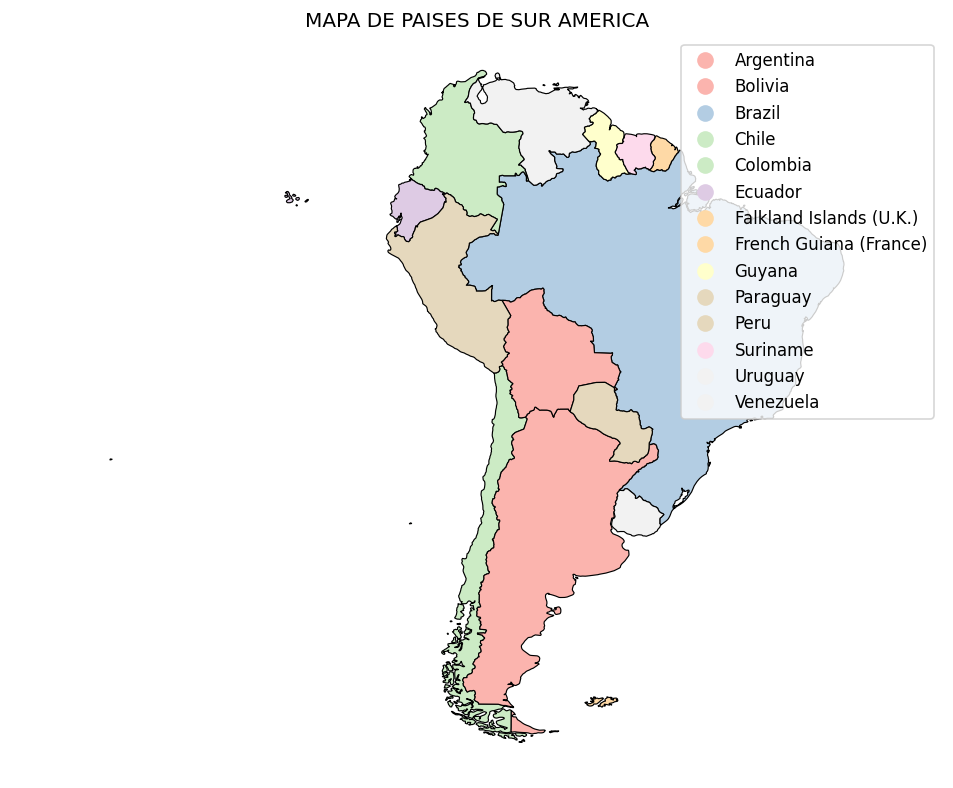

In [36]:
# VARIABLES CALIFICADAS: fig2, ax_region
fig2, ax_region = plt.subplots(1,               # Solo un objeto Axes para la figura.
                               figsize=(10, 8), # Tamaño de la figura.
                               dpi=120)         # Puntos por pulgada de la imagen.
paises_gdf.plot(ax=ax_region, legend=True,cmap='Pastel1',edgecolor='black', linewidth=0.7,column='nombre')
ax_region.set_title('MAPA DE PAISES DE SUR AMERICA')
# Preparamos la gráfica eliminando los bordes numéricos innecesarios.
ax_region.axis('off')
plt.axis('equal')

> **Salida esperada:**
***
<img src = "https://drive.google.com/uc?export=view&id=1KzejoiT3invsKpj8iKtgS5k4yWIyECUG" alt = "Encabezado MLDS" width = "100%">  </img>

### **Evaluar código**

In [37]:
grader.run_test("Test 2_1", globals())

Test 2_1


In [38]:
grader.run_test("Test 2_2", globals())

Test 2_2


## **3. Mapa de Países con una Población Mayor a la Media**
---

En este tercer ejercicio, deberás **replicar el mapa** de los **países de Sur América**, destacando en un color distinto aquellos países cuya **población sea superior a la media** del conjunto de datos.

Para ello, utilizarás el método **`.plot()`** del objeto `GeoDataFrame`, cumpliendo con los siguientes requisitos:

### **Requisitos de la visualización**

- El mapa debe ser graficado sobre un objeto **`Axes`** de `Matplotlib` previamente definido. Utiliza el argumento **`ax`** del método `.plot()`.
- La visualización debe incluir una **leyenda** que indique qué países tienen una población superior al promedio.
- El objeto `Axes` debe tener el siguiente título exacto:

  ```python
  'MAPA DE PAÍSES DE SUR AMÉRICA CON POBLACIÓN MAYOR A LA MEDIA'
  ```
- El color codificará la condición, que usted deberá añadir al _GeoDataFrame_. Además de esto, deberá utilizar el siguiente _colormap_ exacto de _Matplotlib_:

  ```python
  cmap = 'Dark2'
  ```

- Para una fidelidad completa en la representación, el método **`.plot`** deberá recibir los siguientes argumentos que definen el grosor de los mapas:

  ```python
  .plot(...                                   
        edgecolor='black',
        linewidth=0.7)
  ```

> **NOTA: Los comandos para graficar y modificar una figura deberían ir todos en la misma celda. Separarlos en celdas distintas puede causar que no se grafique nada.**

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>
<p>

* Ponga especial atención a los detalles. Elementos como los títulos de las gráficas no son generados por defecto y puede necesitar definirlos.
* El título de la gráfica deberá ser asignado directamente en el objeto **`Axes`** de _Matplotlib_.

    ```python
    ax.set_title('Título de la gráfica')
    ```
* El método **`.plot`** de los objetos **`GeoDataFrame`** recibe múltiples argumentos que le permiten definir detalles de la visualización.

  1. **`column`** - determina la variable respecto a la cual se codifica el color.
  2. **`cmap`** - determina el _colormap_ de _Matplotlib_ usado en la visualización.
  3. **`legend`** - recibe un _booleano_ que determina si se visualiza o no la leyenda. Por defecto **NO** se visualiza.
  4. **`edgecolor`** - determina el color del borde de las figuras geoespaciales dibujadas.
  4. **`linewidth`** - determina el grosor del borde de las figuras geoespaciales dibujadas.


* Detalles como el **`dpi`** no son calificados, pero se recomienda no modificar para que la referencia de salida esperada corresponda y sea más fácil identificar las diferencias.

*  Recuerde que la condición solicitada en este caso no se encuentra en ninguna columna del _GeoDataFrame_ por lo que usted debera manipular la columna 'pob_total' igual que lo haría en pandas y añadir los resultados a una columna nueva.

</p>

(np.float64(-113.1655641),
 np.float64(-31.074035900000002),
 np.float64(-59.3080027),
 np.float64(15.8506787))

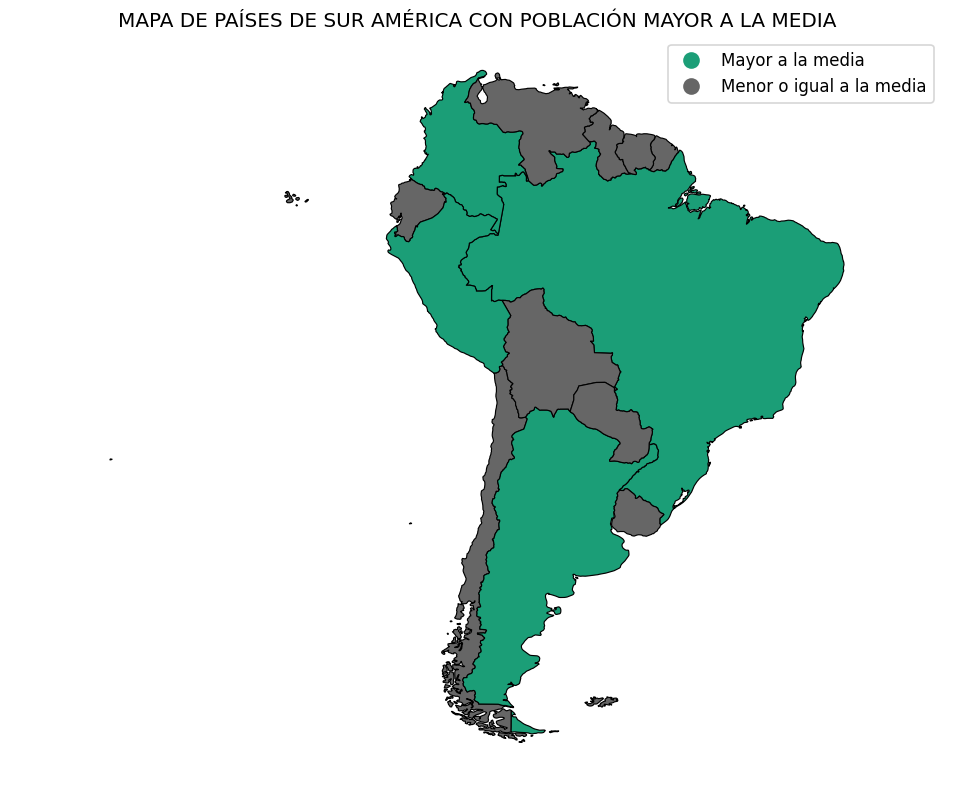

In [46]:
paises_gdf_sol3 = paises_gdf.copy()
# VARIABLES CALIFICADAS: fig3, ax_pob_med
fig3, ax_pob_med = plt.subplots(1,                  # Solo un objeto Axes para la figura.
                               figsize=(10, 8), # Tamaño de la figura.
                               dpi=120)         # Puntos por pulgada de la imagen.

paises_gdf_sol3['pob_mayor_media'] = paises_gdf_sol3['pob_total'] > paises_gdf_sol3['pob_total'].mean()
paises_gdf_sol3['pob_mayor_media'] = paises_gdf_sol3['pob_mayor_media'].map({True:'Mayor a la media',False:"Menor o igual a la media"})
paises_gdf_sol3.plot(column='pob_mayor_media', cmap='Dark2',legend= True, ax=ax_pob_med,edgecolor='black',linewidth=0.7)
# Preparamos la gráfica eliminando los bordes numéricos innecesarios.
ax_pob_med.set_title('MAPA DE PAÍSES DE SUR AMÉRICA CON POBLACIÓN MAYOR A LA MEDIA')
# Preparamos la gráfica eliminando los bordes numéricos innecesarios.
ax_pob_med.axis('off')
plt.axis('equal')


> **Salida esperada:**
***
<img src = "https://drive.google.com/uc?export=view&id=1ct_K1i2ZjBKQHbdu-X6-LYZekLkoiAfg" alt = "Encabezado MLDS" width = "100%">  </img>

### **Evaluar código**

In [47]:
grader.run_test("Test 3_1", globals())

Test 3_1


In [48]:
grader.run_test("Test 3_2", globals())

Test 3_2


## **4. Mapa de Países con Centroide**
---

En este cuarto ejercicio, deberás **replicar el mapa** de los **países de Sur América**, donde cada país se visualice en color verde y se muestre su **centroide representado con un punto rojo**.

Para ello, utilizarás el método **`.plot()`** del objeto `GeoDataFrame`, cumpliendo con los siguientes requisitos:


### **Requisitos de la visualización**

- El mapa debe ser graficado sobre un objeto **`Axes`** de `Matplotlib` previamente definido. Para ello, utiliza el argumento **`ax`** del método `.plot()`.
- La visualización debe incluir una **leyenda** que identifique claramente los elementos representados.
- El objeto `Axes` debe tener el siguiente título exacto:

  ```python
  'MAPA DE PAÍSES Y CENTROIDES'
  ```
- Los polígonos de los países deben graficarse en color verde

  ```python
  color = 'green'
  ```
- Los **centroides** deben representarse con un **punto rojo** (marcador `'o'`) y tamaño **10**:

  ```python
  marker='o'
  color = 'red'
  markersize=10
  ```

* Para una fidelidad completa en la representación, el método **`.plot`** deberá recibir los siguientes argumentos que definen el grosor de los mapas:

  ```python
  .plot(...                                   
        edgecolor='black',
        linewidth=0.7)
  ```

> **NOTA: Los comandos para graficar y modificar una figura deberían ir todos en la misma celda. Separarlos en celdas distintas puede causar que no se grafique nada.**

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>
<p>

* Ponga especial atención a los detalles. Elementos como los títulos de las gráficas no son generados por defecto y puede necesitar definirlos.
* El título de la gráfica deberá ser asignado directamente en el objeto **`Axes`** de _Matplotlib_.

    ```python
    ax.set_title('Título de la gráfica')
    ```
* El método **`.plot`** de los objetos **`GeoDataFrame`** recibe múltiples argumentos que le permiten definir detalles de la visualización.

  1. **`column`** - determina la variable respecto a la cual se codifica el color.
  2. **`cmap`** - determina el _colormap_ de _Matplotlib_ usado en la visualización.
  3. **`legend`** - recibe un _booleano_ que determina si se visualiza o no la leyenda. Por defecto **NO** se visualiza.
  4. **`edgecolor`** - determina el color del borde de las figuras geoespaciales dibujadas.
  4. **`linewidth`** - determina el grosor del borde de las figuras geoespaciales dibujadas.


* Detalles como el **`dpi`** no son calificados, pero se recomienda no modificar para que la referencia de salida esperada corresponda y sea más fácil identificar las diferencias.

*  Recuerde que los centroides puede obtnerlos por medio del atributos _centroid_ de la columna _geometry_
</p>

(np.float64(-12597532.97094556),
 np.float64(-3459145.853279902),
 np.float64(-7945852.511885887),
 np.float64(1830362.1527159447))

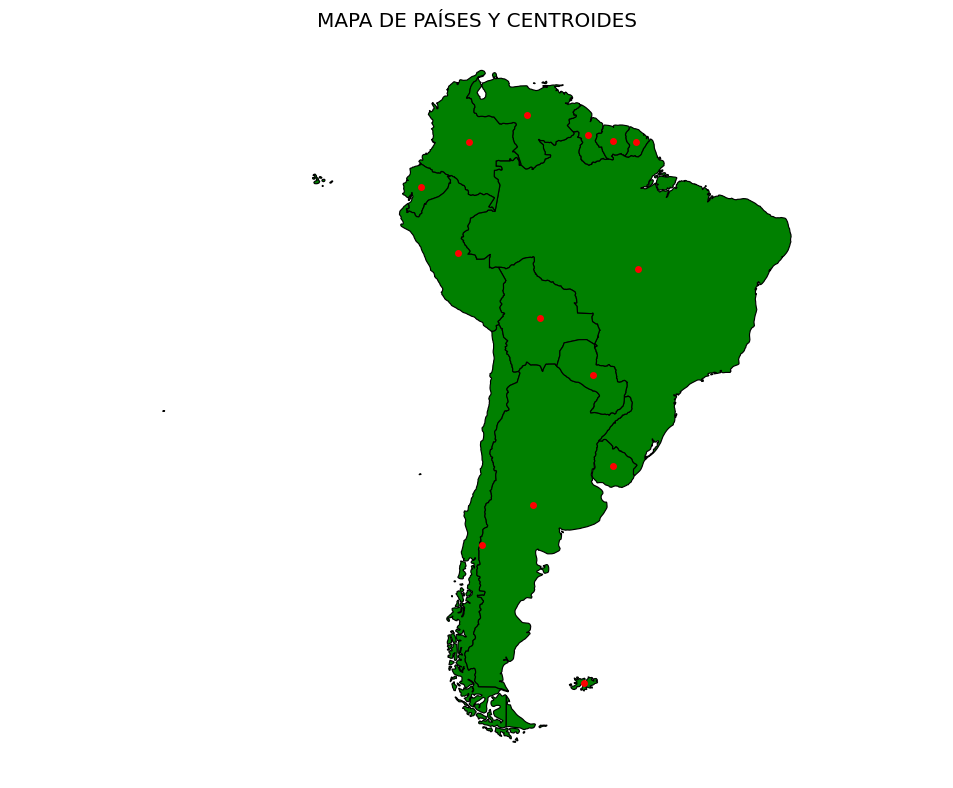

In [51]:
# VARIABLES CALIFICADAS: fig4, ax_centroide
paises_gdf_projected = paises_gdf.to_crs(epsg=3395)
fig4, ax_centroide = plt.subplots(1,                  # Solo un objeto Axes para la figura.
                               figsize=(10, 8), # Tamaño de la figura.
                               dpi=120)         # Puntos por pulgada de la imagen.

paises_gdf_projected.plot(ax=ax_centroide,
                          legend=True,
                          color='green',
                          edgecolor='black',
                          linewidth=0.7)
paises_gdf_projected.centroid.plot(ax=ax_centroide,
                              marker='o',
                              color='red',
                              markersize=10

)
ax_centroide.set_title('MAPA DE PAÍSES Y CENTROIDES')
# Preparamos la gráfica eliminando los bordes numéricos innecesarios.
ax_centroide.axis('off')
plt.axis('equal')

> **Salida esperada:**
***
<img src = "https://drive.google.com/uc?export=view&id=1KcVeHPM9jpfPdUlIIkevPpuDlc9GP_OF" alt = "Encabezado MLDS" width = "100%">  </img>

### **Evaluar código**

In [52]:
grader.run_test("Test 4_1", globals())

Test 4_1


In [53]:
grader.run_test("Test 4_2", globals())

Test 4_2


## **Evaluación**
**¡Felicitaciones!** Ha terminado la tarea de la Unidad 5. ¡Excelente trabajo!


In [54]:
grader.submit_task(globals())

Test 1_1
Test 1_2
Test 2_1
Test 2_2
Test 3_1
Test 3_2
Test 4_1
Test 4_2


Revisa en UNCode tus submissions en la [página de la tarea.](https://uncode.unal.edu.co/course/AYVDD-GroupMLDS-1-2026-1/129c7d2b-cf83-4c9a-a0cb-cdc6ad11c37e)

## **Créditos**
---

* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistente docente:**
* Juan Sebastian Malagón Torres
* Alberto Nicolai Romero Martínez

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*
